# Форматирование графиков 

Поскольку функциональность построения графиков реализована как рецепт Plots.jl, [все параметры, открытые для Plots.jl, могут использоваться на наших графиках](https://juliaplots.github.io/supported/) , Кроме того, есть специальные функции для [графиков дифференциальных уравнений](http://docs.juliadiffeq.org/latest/basics/plot.html). Этот урок научит некоторым из наиболее часто используемых вариантов. Давайте сначала получим решение для некоторого ODE. Здесь я буду использовать одно из обыкновенных дифференциальных уравнений Лоренца. Как и со всеми командами в DifferentialEquations.jl, я получил график решения, вызвав `solve` для проблемы и` plot` для решения:

In [1]:
using DifferentialEquations, Plots, ParameterizedFunctions

In [2]:
lorenz = @ode_def Lorenz begin
  dx = σ*(y-x)
  dy = ρ*x-y-x*z
  dz = x*y-β*z
end σ β ρ

p = [10.0,8/3,28]
u0 = [1., 5., 10.]
tspan = (0., 100.)
prob = ODEProblem(lorenz, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 1364-element Array{Float64,1}:
   0.0
   0.0354861341350177
   0.060663987304508726
   0.10188870843348657
   0.1448498679508511
   0.19835698662820245
   0.2504996228815297
   0.3056774805827286
   0.35452829390108126
   0.40770996764610945
   0.45396975760765645
   0.5146359501891049
   0.5750607253053894
   ⋮
  99.15583516692725
  99.23292273060329
  99.32151766144162
  99.40058431429719
  99.50213193895421
  99.58940848301859
  99.67448093122454
  99.74363551486263
  99.81657581423784
  99.89159113876296
  99.97174161282821
 100.0
u: 1364-element Array{Array{Float64,1},1}:
 [1.0, 5.0, 10.0]
 [2.315652235826171, 5.8975594368077555, 9.406792559102836]
 [3.2377953504336454, 7.041031570475975, 9.233678311348147]
 [4.99386818429419, 9.832941470623641, 9.626109614367385]
 [7.421184550586378, 13.949270734328802, 11.582332131961156]
 [11.459763300544132, 19.753113924253217, 18.10429551917727]
 [15.476108075765074, 2

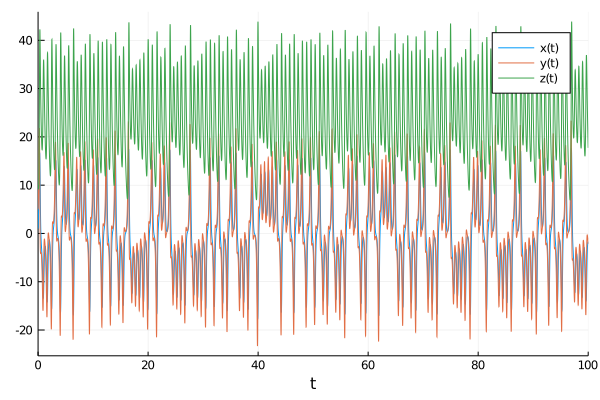

In [3]:
plot(sol)

Теперь давайте изменим его на фазовый график. Как обсуждалось на [страница функций графика](http://docs.juliadiffeq.org/latest/basics/plot.html), мы можем использовать команду `vars`, чтобы выбрать переменные для построения. Давайте нарисуем переменную `x` против переменной` y` против переменной `z`:

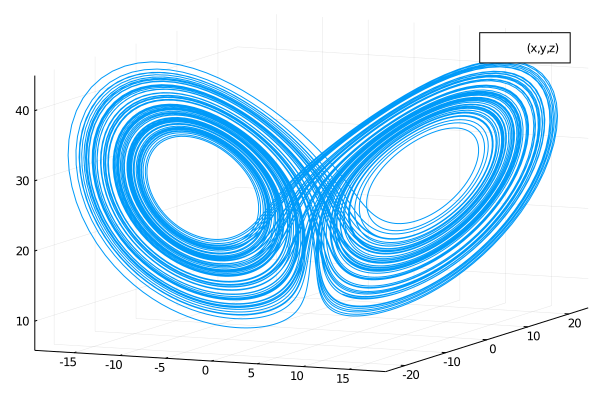

In [4]:
plot(sol,vars=(1,2,3))

Можно строить от одной переменной

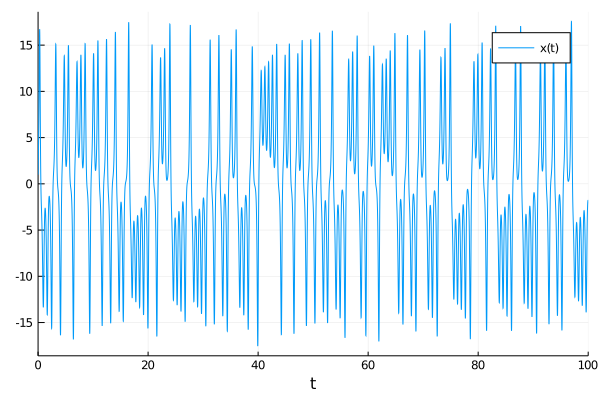

In [5]:
plot(sol,vars=[:x])

Обратите внимание, что мы смогли использовать имена переменных, потому что мы определили проблему с макросом. Но в целом мы можем использовать индексы. Предыдущие сюжеты будут:

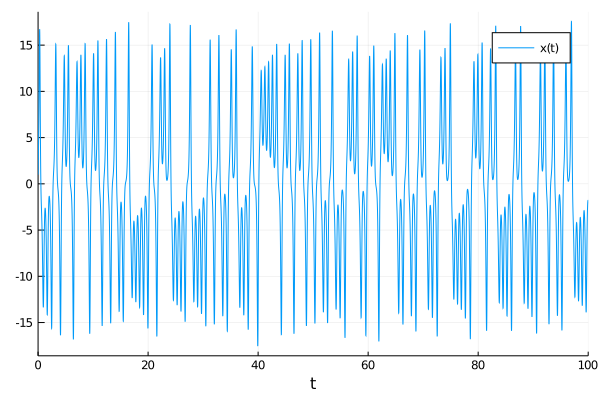

In [6]:
plot(sol,vars=(1,2,3))
plot(sol,vars=[1])

Распространенными вариантами являются добавление заголовков, осей и меток. Например:

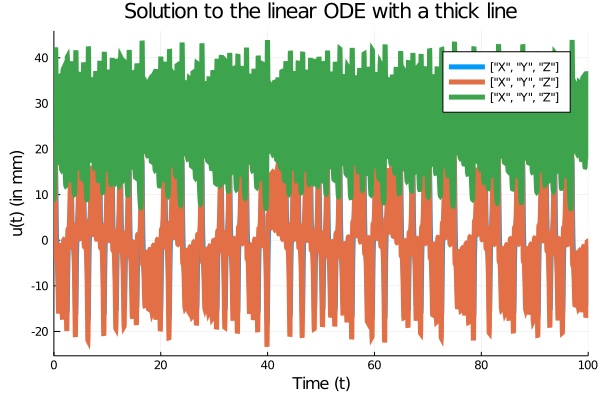

In [7]:
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
xaxis="Time (t)",yaxis="u(t) (in mm)",label=["X","Y","Z"])

Например, мы можем использовать точечный график для временных рядов:

In [8]:
scatter(sol,vars=[:x])

Это показывает, что рецепт использует интерполяцию для сглаживания графика. Это становится совершенно ясным, когда мы выключаем его с помощью `densplot = false`:

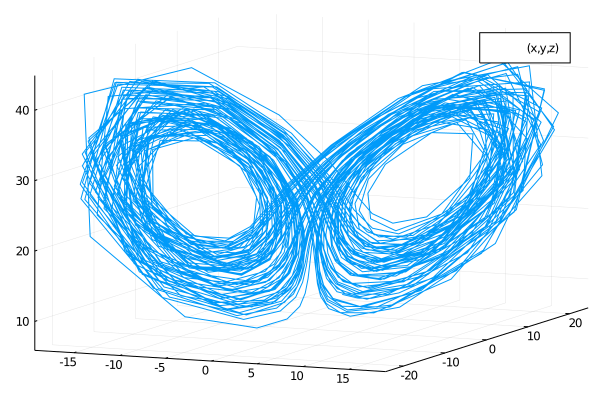

In [9]:
plot(sol,vars=(1,2,3),denseplot=false)

Когда это будет сделано, будут отображаться только те значения, которые были получены интегратором. Использование интерполяции обычно приводит к получению намного более привлекательного графика, поэтому рекомендуем, и поскольку интерполяции имеют порядки, аналогичные численным методам, их результаты заслуживают доверия на всём интервале. Мы можем контролировать количество точек, используемых на графике интерполяции, используя команду `plotdensity`:

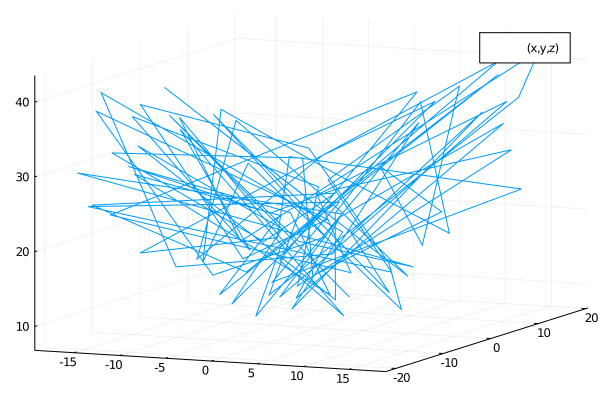

In [10]:
plot(sol,vars=(1,2,3),plotdensity=100)

Это построение всего решения с использованием 100 точек, равномерно распределенных по времени.. 

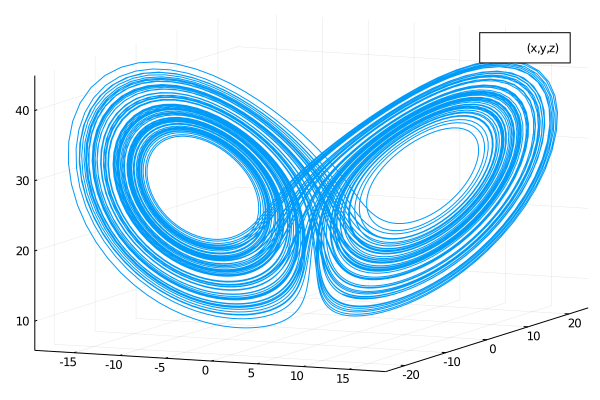

In [11]:
plot(sol,vars=(1,2,3),plotdensity=10000)

Это будет посимпотишней! По умолчанию используется `100 * length (sol)`, где длина - это количество внутренних шагов, которые он должен был сделать. Эта эвристика обычно работает хорошо, но необычайно сложные уравнения могут быть смягчены (поскольку она будет выполняться небольшими шагами), а для уравнений с событиями / несплошностями повышение плотности графика может помочь разрешить разрыв. 

Наконец, обратите внимание, что мы можем составлять сюжеты. Давайте покажем, где 100 точек используют точечный график:

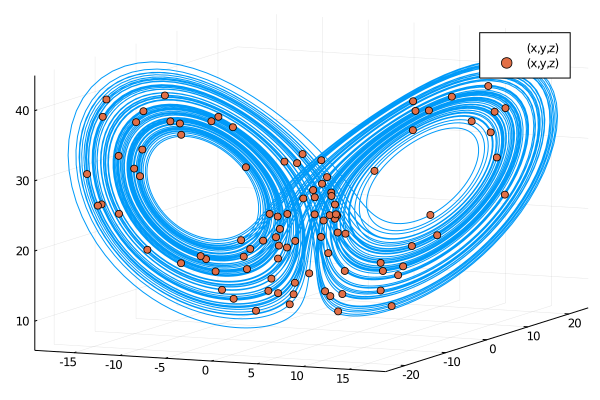

In [12]:
plot(sol,vars=(1,2,3))
scatter!(sol,vars=(1,2,3),plotdensity=100)

Мы можем работать с графическим объектом явно.       Эта форма может быть лучше для построения сложного сюжета в цикле.

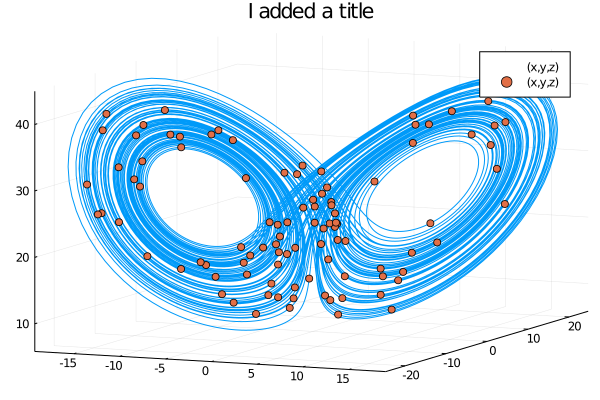

In [13]:
p = plot(sol,vars=(1,2,3))
scatter!(p,sol,vars=(1,2,3),plotdensity=100)
title!("I added a title")

Теперь Вы можете делать все что угодно. Повеселитесь!